In [1]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_core as rcp

start_time = time.time()

In [2]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

In [3]:
data_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/"
f_name = "Regular_filledGap_Grant_SF_2017_NDVI.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)

In [4]:
a_df = rc.initial_clean_NDVI(a_df)

In [5]:
a_df.head(2)

,ID,Acres,county,CropGrp,CropTyp,DataSrc,ExctAcr,IntlSrD,Irrigtn,LstSrvD,Notes,RtCrpTy,Shap_Ar,Shp_Lng,TRS,image_year,SF_year,doy,NDVI
0,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,213,0.685304
1,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,223,0.733553


In [6]:
a_df = a_df[a_df['ID'] == a_df.ID.unique()[0]].copy()
a_df.head(2)

,ID,Acres,county,CropGrp,CropTyp,DataSrc,ExctAcr,IntlSrD,Irrigtn,LstSrvD,Notes,RtCrpTy,Shap_Ar,Shp_Lng,TRS,image_year,SF_year,doy,NDVI
0,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,213,0.685304
1,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,223,0.733553


In [10]:
a_df.head(2)

,ID,Acres,county,CropGrp,CropTyp,DataSrc,ExctAcr,IntlSrD,Irrigtn,LstSrvD,Notes,RtCrpTy,Shap_Ar,Shp_Lng,TRS,image_year,SF_year,doy,NDVI
0,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,213,0.685304
1,115184_WSDA_SF_2017,72.0,Grant,Orchard,apple,wsda,72.371199,2006/08/31,micro-sprinkler,2017/04/24,NaN,NaN,292875.850894,3308.620365,T13R24E4,2016,2017,223,0.733553


In [8]:
A = rc.add_human_start_time_by_YearDoY(a_df)

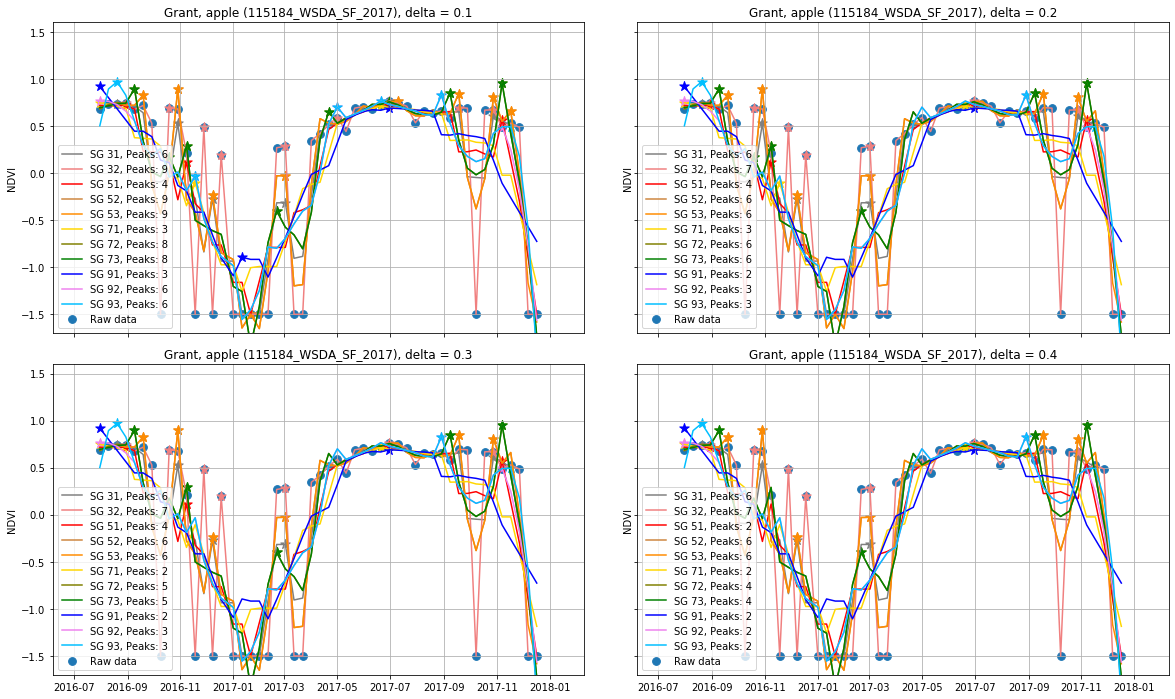

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

SF_year = 2017
IDX = "NDVI"

rcp.savitzky_2yrs_panel(crr_fld = A, idx = IDX, deltA = 0.1, SFYr = SF_year, ax = ax1)
rcp.savitzky_2yrs_panel(crr_fld = A, idx = IDX, deltA = 0.2, SFYr = SF_year, ax = ax2)
rcp.savitzky_2yrs_panel(crr_fld = A, idx = IDX, deltA = 0.3, SFYr = SF_year, ax = ax3)
rcp.savitzky_2yrs_panel(crr_fld = A, idx = IDX, deltA = 0.4, SFYr = SF_year, ax = ax4)


In [25]:
from datetime import date
import pandas as pd

year = 2017
DoY = 41
x = str(date.fromordinal(date(year, 1, 1).toordinal() + DoY - 1))
x

'2017-02-10'

In [14]:
d = {'year': [2016, 2017], 'DoY': [32, 41]}
df = pd.DataFrame(data=d)
df

,year,DoY
0,2016,32
1,2017,41


In [20]:
type(date.fromordinal(date(year, 1, 1).toordinal() + DoY - 1))

datetime.date

In [21]:
date.fromordinal(date(year, 1, 1).toordinal() + DoY - 1)

datetime.date(2016, 2, 1)

In [23]:
df['Date'] = pd.to_datetime(df['year'] * 1000 + df['DoY'], format='%Y%j')

In [24]:
df

,year,DoY,Date
0,2016,32,2016-02-01
1,2017,41,2017-02-10
